In [1]:
import csv 
import sys
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

import json

In [2]:
# Tests to see if we are running in the Google Colaboratory environment
# If so, use an https URL to access the data.  Otherwise, load via the file path
try:
  import google.colab
  data_file_prefix = "https://raw.githubusercontent.com/slankas/DataScienceNotebooks/master/Networking/"
  import plotly.io as pio
  pio.renderers.default = 'colab'
except:
  data_file_prefix = ""

In [3]:
G = nx.DiGraph()

with open(data_file_prefix + "data/social-relationships.csv", 'r' ) as theFile:
    reader = csv.DictReader(theFile)
    for line in reader:
        G.add_edge(line["src"],line["dst"])

In [4]:
def displayGraph(G):
    plt.figure(num=None, figsize=(10, 10), dpi=80)

    pos = nx.spring_layout(G,k=4)  # positions for all nodes

    # nodes
    nx.draw_networkx_nodes(G, pos, node_size=100)

    # edges
    nx.draw_networkx_edges(G, pos, edgelist= G.edges, width=1, alpha=0.5, edge_color="b", style="dashed", arrows=True, arrowsize=10)
    
    #labels
    nx.draw_networkx_labels(G, pos, font_size=10, font_family="sans-serif")

    plt.axis("off")
    plt.show()

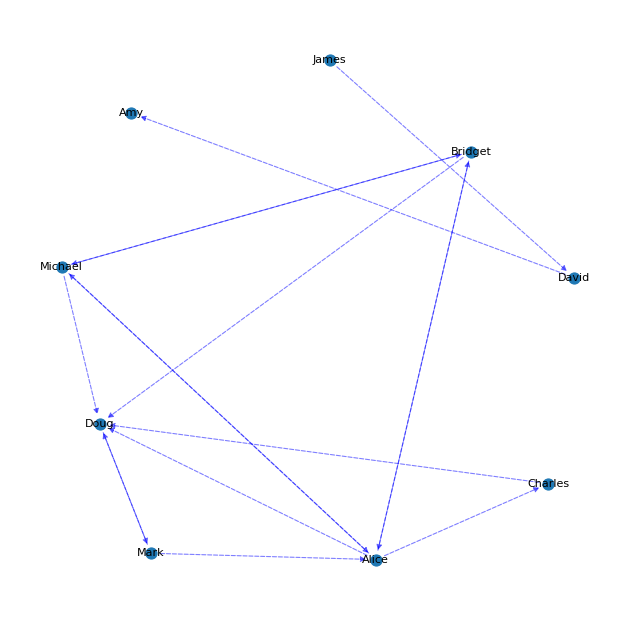

In [5]:
displayGraph(G)

In [6]:
print(G.degree(G.nodes))
print(G.in_degree(G.nodes))
print(G.out_degree(G.nodes))

[('Alice', 7), ('Bridget', 5), ('Charles', 2), ('Mark', 3), ('Doug', 6), ('Michael', 5), ('David', 2), ('Amy', 1), ('James', 1)]
[('Alice', 3), ('Bridget', 2), ('Charles', 1), ('Mark', 1), ('Doug', 5), ('Michael', 2), ('David', 1), ('Amy', 1), ('James', 0)]
[('Alice', 4), ('Bridget', 3), ('Charles', 1), ('Mark', 2), ('Doug', 1), ('Michael', 3), ('David', 1), ('Amy', 0), ('James', 1)]


In [7]:
df = pd.DataFrame(G.degree(G.nodes), columns=['Name','Degree'])
print(df)

      Name  Degree
0    Alice       7
1  Bridget       5
2  Charles       2
3     Mark       3
4     Doug       6
5  Michael       5
6    David       2
7      Amy       1
8    James       1


In [8]:
merged_list = list(map(lambda x,y,z: (x[0],x[1],y[1],z[1]), G.degree(G.nodes), G.in_degree(G.nodes),G.out_degree(G.nodes)  ) )
df = pd.DataFrame(merged_list, columns=['Name','Degree', 'In Degree', 'Out Degree'])
print(df)

      Name  Degree  In Degree  Out Degree
0    Alice       7          3           4
1  Bridget       5          2           3
2  Charles       2          1           1
3     Mark       3          1           2
4     Doug       6          5           1
5  Michael       5          2           3
6    David       2          1           1
7      Amy       1          1           0
8    James       1          0           1


In [9]:
# The implementation of closeness differs from that presented in class:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.closeness_centrality.html
print (nx.closeness_centrality(G))

{'Alice': 0.390625, 'Bridget': 0.28409090909090906, 'Charles': 0.3125, 'Mark': 0.3472222222222222, 'Doug': 0.625, 'Michael': 0.28409090909090906, 'David': 0.125, 'Amy': 0.16666666666666666, 'James': 0.0}


In [10]:
#https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.centrality.betweenness_centrality.html
print (nx.betweenness_centrality(G,normalized=False))

{'Alice': 10.0, 'Bridget': 0.0, 'Charles': 0.0, 'Mark': 7.0, 'Doug': 7.0, 'Michael': 0.0, 'David': 1.0, 'Amy': 0.0, 'James': 0.0}


In [11]:
pr = nx.pagerank(G)
print(pr)

{'Alice': 0.168963808848306, 'Bridget': 0.08081864024800701, 'Charles': 0.0579198998878865, 'Mark': 0.23799921264506887, 'Doug': 0.2541006347117323, 'Michael': 0.08081864024800701, 'David': 0.0407287140660066, 'Amy': 0.05663492828138894, 'James': 0.022015521063596753}
